In [250]:
import warnings
warnings.filterwarnings('ignore')

import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
from bettermdptools.algorithms.planner import Planner
from bettermdptools.utils.plots import Plots
import matplotlib.pyplot as plt
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
from bettermdptools.utils.test_env import TestEnv

In [251]:
def visualizeEnv(frozenLake,size=(8, 8)):

    # Map state to cell type
    state_to_cell = {
        b'S': 'S',  # Start
        b'F': 'F',  # Frozen
        b'H': 'H',  # Hole
        b'G': 'G'   # Goal
    }

    # Map cell type to color
    cell_colors = {
        'S': 'blue',
        'F': 'lightblue',
        'H': 'black',
        'G': 'green'
    }

    # Get the state grid
    state_grid = np.array(env.desc, dtype='str')

    # Create a plot of the grid
    plt.figure(figsize=(4, 4))
    for i in range(state_grid.shape[0]):
        for j in range(state_grid.shape[1]):
            cell_type = state_to_cell[frozenLake.desc[i, j].item()]
            plt.scatter(j, i, color=cell_colors[cell_type], s=100, marker='s')
            plt.text(j, i, cell_type, ha='center', va='center', color='white' if cell_type == 'H' else 'black')

    # Add gridlines to show the boundaries between squares
    plt.grid(True, which='both', color='gray', linewidth=1.5)

    plt.title('8x8 FrozenLake Environment')
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.gca().invert_yaxis()  # Invert y-axis to match grid indexing
    plt.show()

In [270]:
map_size = 16

In [271]:
#env = gym.make('FrozenLake-v1',is_slippery=False)
env = gym.make('FrozenLake-v1',desc=generate_random_map(size=map_size), is_slippery=True)

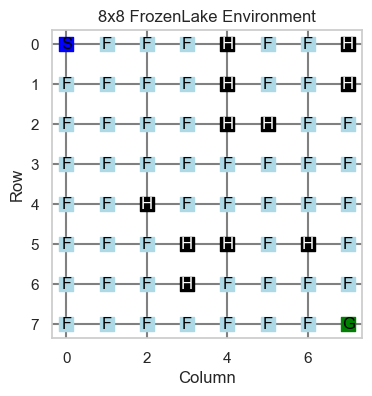

In [254]:
visualizeEnv(env)

In [272]:
planner = Planner(env.P)

In [278]:
# run VI
V, V_track, policy = planner.value_iteration(gamma = 0.9)

runtime = 0.24 seconds


In [257]:
print(policy)

{0: 1, 1: 2, 2: 2, 3: 0, 4: 0, 5: 2, 6: 0, 7: 0, 8: 1, 9: 1, 10: 1, 11: 0, 12: 0, 13: 2, 14: 0, 15: 0, 16: 1, 17: 1, 18: 1, 19: 0, 20: 0, 21: 0, 22: 2, 23: 1, 24: 1, 25: 1, 26: 3, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 0, 34: 0, 35: 2, 36: 3, 37: 2, 38: 3, 39: 2, 40: 1, 41: 1, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 2, 48: 1, 49: 1, 50: 0, 51: 0, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 2, 61: 2, 62: 2, 63: 0}


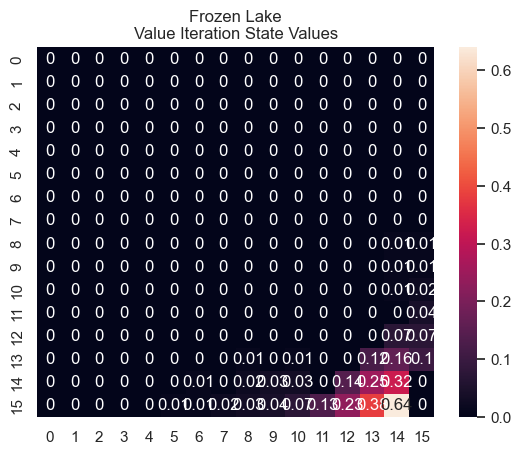

In [279]:
size=(map_size,map_size)
Plots.values_heat_map(V, "Frozen Lake\nValue Iteration State Values", size)

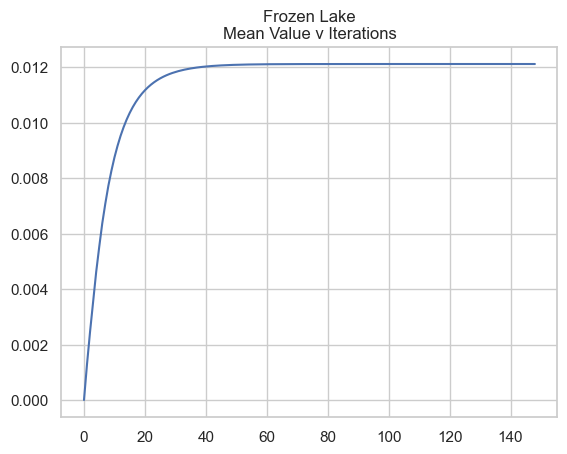

In [280]:
max_value_per_iter = np.trim_zeros(np.mean(V_track, axis=1), 'b')
Plots.v_iters_plot(max_value_per_iter, "Frozen Lake\nMean Value v Iterations")

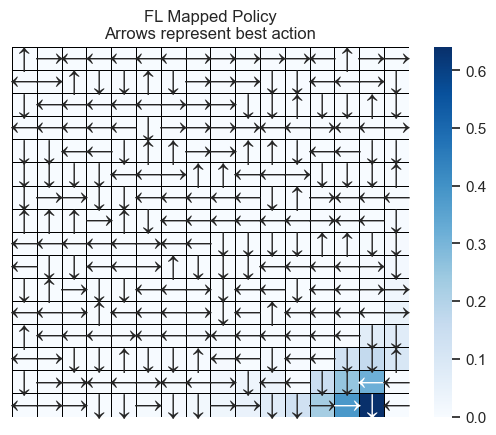

In [281]:
fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
fl_map_size=(map_size,map_size)
title="FL Mapped Policy\nArrows represent best action"
val_max, policy_map = Plots.get_policy_map(policy, V, fl_actions, fl_map_size)
Plots.plot_policy(val_max, policy_map, fl_map_size, title)

In [282]:
#test policy
test_scores = TestEnv.test_env(env=env, n_iters=10000, render=False, pi=policy, user_input=False)
print(np.mean(test_scores))


0.0


In [276]:
total_elements = len(test_scores)
ones_count = sum(test_scores)
percentage_ones = (ones_count / total_elements) * 100
print(percentage_ones)

0.0


## Policy Iteration

In [263]:
# run VI
V_pi, V_track_pi, policy_Pi = planner.policy_iteration(gamma = 0.9)

runtime = 0.07 seconds


In [264]:
test_scores_pi = TestEnv.test_env(env=env, n_iters=10000, render=False, pi=policy_Pi, user_input=False)
print(np.mean(test_scores_pi))

0.4211


In [265]:
total_elements = len(test_scores)
ones_count = sum(test_scores)
percentage_ones = (ones_count / total_elements) * 100
print(percentage_ones)

41.47


In [266]:
env.spec

EnvSpec(id='FrozenLake-v1', entry_point='gymnasium.envs.toy_text.frozen_lake:FrozenLakeEnv', reward_threshold=0.7, nondeterministic=False, max_episode_steps=100, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={'map_name': '4x4', 'desc': ['SFFFHFFH', 'FFFFHFFH', 'FFFFHHFF', 'FFFFFFFF', 'FFHFFFFF', 'FFFHHFHF', 'FFFHFFFF', 'FFFFFFFG'], 'is_slippery': True}, namespace=None, name='FrozenLake', version=1)

In [267]:
env.observation_space

Discrete(64)

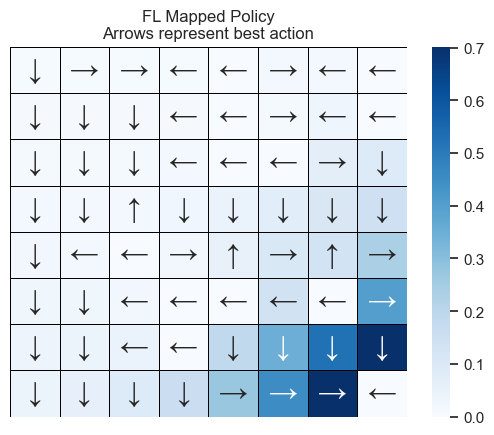

In [269]:
fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
fl_map_size=(map_size,map_size)
title="FL Mapped Policy\nArrows represent best action"
val_max, policy_map = Plots.get_policy_map(policy, V, fl_actions, fl_map_size)
Plots.plot_policy(val_max, policy_map, fl_map_size, title)